In [133]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [134]:
# Common imports
import numpy as np
import os

In [135]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [168]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [169]:
#get the data

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [170]:

fetch_housing_data()

PermissionError: [Errno 13] Permission denied: 'datasets\\housing\\housing.csv'

In [140]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [141]:
house=load_housing_data()

In [142]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [143]:
 house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Saving figure latitudeVSlongitude


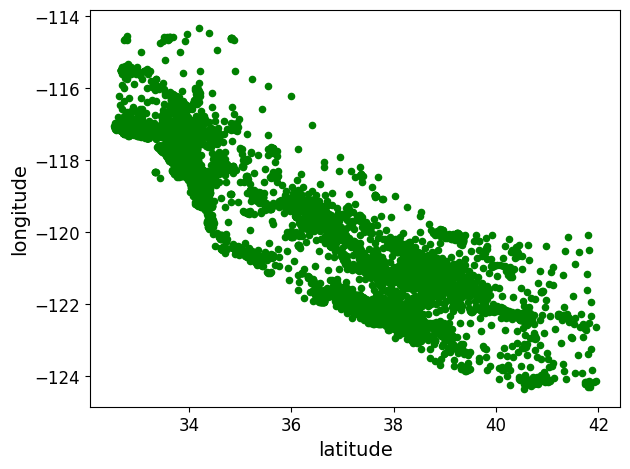

In [144]:
house.plot(kind="scatter",x="latitude",y="longitude",color="green")
save_fig("latitudeVSlongitude")

Saving figure latitudeVSlongitudebetter


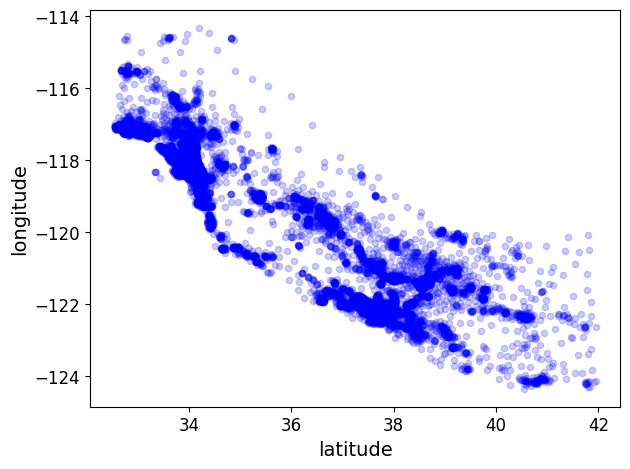

In [145]:
house.plot(kind="scatter",x="latitude",y="longitude",color="blue",alpha=0.2)
save_fig("latitudeVSlongitudebetter")

Saving figure latitudeVSLongitudeWithMedianHousevalue


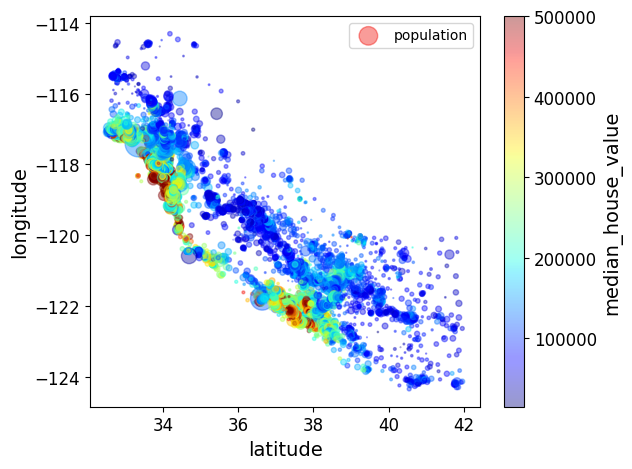

In [146]:
house.plot(kind="scatter",x="latitude",y="longitude",alpha=0.4,s=house["population"]/100,label="population",
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()

save_fig("latitudeVSLongitudeWithMedianHousevalue")

In [147]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [148]:
house['total_bedrooms'].fillna(house['total_bedrooms'].mean(),inplace=True)

C:\Users\sujal\AppData\Local\Temp\ipykernel_6048\3391225141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['total_bedrooms'].fillna(house['total_bedrooms'].mean(),inplace=True)


In [149]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [150]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [151]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first")

In [152]:
encoded_data=encoder.fit_transform(house[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate the original DataFrame (excluding 'ocean_proximity') with the encoded DataFrame
house = pd.concat([house.drop('ocean_proximity', axis=1), encoded_df], axis=1)


In [153]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  float64
 10  ocean_proximity_ISLAND      20640 non-null  float64
 11  ocean_proximity_NEAR BAY    20640 non-null  float64
 12  ocean_proximity_NEAR OCEAN  20640 non-null  float64
dtypes: float64(13)
memory usage: 2.

In [155]:
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0.0,0.0,1.0,0.0


In [156]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(house,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler


In [157]:
x=house.drop('median_house_value',axis=1)
y=house['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [158]:
scaler=StandardScaler()

In [159]:
exclude_columns = ['latitude', 'longitude']
columns_to_scale = [col for col in X_train.columns if col not in exclude_columns]

In [160]:
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [161]:
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [162]:
X_train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.680574,-0.015566,-0.355646,2.629758
8267,-118.16,33.77,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.680574,-0.015566,-0.355646,2.629758
17445,-120.48,34.66,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,-0.680574,-0.015566,-0.355646,2.629758
14265,-117.11,32.69,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.680574,-0.015566,-0.355646,2.629758
2271,-119.80,36.78,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,1.469348,-0.015566,-0.355646,-0.380263
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,-0.680574,-0.015566,-0.355646,-0.380263
11964,-117.43,34.02,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,1.469348,-0.015566,-0.355646,-0.380263
5390,-118.38,34.03,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.680574,-0.015566,-0.355646,-0.380263
860,-121.96,37.58,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,-0.680574,-0.015566,-0.355646,-0.380263


In [163]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_INLAND      16512 non-null  float64
 9   ocean_proximity_ISLAND      16512 non-null  float64
 10  ocean_proximity_NEAR BAY    16512 non-null  float64
 11  ocean_proximity_NEAR OCEAN  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [164]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   4128 non-null   float64
 1   latitude                    4128 non-null   float64
 2   housing_median_age          4128 non-null   float64
 3   total_rooms                 4128 non-null   float64
 4   total_bedrooms              4128 non-null   float64
 5   population                  4128 non-null   float64
 6   households                  4128 non-null   float64
 7   median_income               4128 non-null   float64
 8   ocean_proximity_INLAND      4128 non-null   float64
 9   ocean_proximity_ISLAND      4128 non-null   float64
 10  ocean_proximity_NEAR BAY    4128 non-null   float64
 11  ocean_proximity_NEAR OCEAN  4128 non-null   float64
dtypes: float64(12)
memory usage: 419.2 KB


In [165]:
X_test_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,4128.00000,4128.00000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4.128000e+03,4128.000000,4128.000000
mean,-119.51936,35.58671,0.012379,-0.014352,-0.007474,-0.004293,-0.005870,-0.026476,0.008984,1.721276e-18,-0.021101,0.036823
std,1.99447,2.13276,0.993349,1.015993,1.003222,0.979773,1.017887,0.988068,1.003618,1.000121e+00,0.973631,1.040067
min,-124.19000,32.54000,-2.190766,-1.212190,-1.280439,-1.247516,-1.307202,-1.775438,-0.680574,-1.556621e-02,-0.355646,-0.380263
25%,-121.69000,33.93000,-0.841786,-0.561950,-0.569212,-0.567670,-0.582709,-0.699627,-0.680574,-1.556621e-02,-0.355646,-0.380263
50%,-118.47000,34.23000,0.031083,-0.244647,-0.226726,-0.234343,-0.246713,-0.199951,-0.680574,-1.556621e-02,-0.355646,-0.380263
75%,-117.99000,37.70000,0.665897,0.210268,0.206454,0.259931,0.257282,0.401826,1.469348,-1.556621e-02,-0.355646,-0.380263
max,-114.58000,41.81000,1.856173,16.230712,11.772241,12.924594,12.308529,5.839268,1.469348,6.424173e+01,2.811787,2.629758


In [166]:
X_train_scaled.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.680574,-0.015566,-0.355646,2.629758
8267,-118.16,33.77,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.680574,-0.015566,-0.355646,2.629758
17445,-120.48,34.66,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,-0.680574,-0.015566,-0.355646,2.629758
14265,-117.11,32.69,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.680574,-0.015566,-0.355646,2.629758
2271,-119.80,36.78,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,1.469348,-0.015566,-0.355646,-0.380263
17848,-121.86,37.42,-0.683082,1.099060,0.643214,1.115675,0.790151,1.439919,-0.680574,-0.015566,-0.355646,-0.380263
6252,-117.97,34.04,-0.048268,-0.439627,-0.289972,-0.062842,-0.293963,-0.715013,-0.680574,-0.015566,-0.355646,-0.380263
9389,-122.53,37.91,0.665897,-0.054266,-0.335319,-0.375941,-0.217838,2.157529,-0.680574,-0.015566,2.811787,-0.380263
6113,-117.90,34.13,-1.873359,-0.697148,-0.531026,-0.534249,-0.496085,-1.250241,-0.680574,-0.015566,-0.355646,-0.380263
6061,-117.79,34.02,-1.873359,7.379811,5.545428,7.036405,5.977096,1.336938,-0.680574,-0.015566,-0.355646,-0.380263


In [132]:
X_test_scaled.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,-0.286324,-0.522862,-0.001495,-0.030301,-0.370087,-1.155085,1.469348,-0.015566,-0.355646,-0.380263
3024,-119.46,35.14,0.110435,0.138415,-0.001495,0.121851,0.220532,-0.708659,1.469348,-0.015566,-0.355646,-0.380263
15663,-122.44,37.80,1.856173,0.546310,-0.001495,-0.102419,1.215396,-0.210402,-0.680574,-0.015566,2.811787,-0.380263
20484,-118.72,34.28,-0.921138,0.188080,-0.001495,0.244979,-0.013091,0.975113,-0.680574,-0.015566,-0.355646,-0.380263
9814,-121.93,36.62,0.427842,-0.133821,-0.001495,-0.319653,-0.188964,-0.081794,-0.680574,-0.015566,-0.355646,2.629758
13311,-117.61,34.08,-1.317896,0.820846,-0.001495,0.856225,0.900400,0.437942,1.469348,-0.015566,-0.355646,-0.380263
7113,-118.02,33.89,0.586545,-0.582643,-0.001495,-0.665293,-0.732333,0.631826,-0.680574,-0.015566,-0.355646,-0.380263
7668,-118.08,33.92,0.745249,-0.601038,-0.001495,-0.365387,-0.606334,-0.099754,-0.680574,-0.015566,-0.355646,-0.380263
18246,-122.08,37.39,-1.952710,-0.160953,-0.001495,-0.331087,0.220532,0.484628,-0.680574,-0.015566,2.811787,-0.380263
5723,-118.23,34.18,1.300711,-0.142558,-0.001495,-0.425192,-0.422586,2.222647,-0.680574,-0.015566,-0.355646,-0.380263


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score

In [172]:
model=LinearRegression()

In [173]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [174]:
y_train_predicted=model.predict(X_train_scaled)

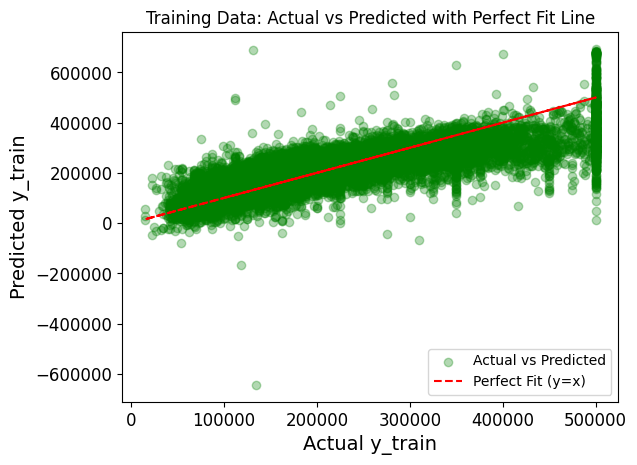

Saving figure trainVsPREDICTED


<Figure size 640x480 with 0 Axes>

In [180]:
plt.scatter(y_train, y_train_predicted, color='green', label='Actual vs Predicted',alpha=0.3)

plt.plot(y_train, y_train, color='red', linestyle='--', label='Perfect Fit (y=x)')

plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train')
plt.title('Training Data: Actual vs Predicted with Perfect Fit Line')
plt.legend()


plt.show()
save_fig("trainVsPREDICTED")

In [183]:
y_test_predicted = model.predict(X_test_scaled)

In [184]:
r2_train = r2_score(y_train, y_train_predicted)

r2_test = r2_score(y_test, y_test_predicted)

print(f"R-squared for training data: {r2_train:.2f}")
print(f"R-squared for test data: {r2_test:.2f}")

R-squared for training data: 0.65
R-squared for test data: 0.63


In [185]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))

print(f"RMSE for training data: {rmse_train:.2f}")
print(f"RMSE for test data: {rmse_test:.2f}")

RMSE for training data: 68433.94
RMSE for test data: 70031.42


In [ ]:
#above rmse and r2 score indicated model has not performed well for linear regression